# Welcome to Machine Learning - Week 7
Instructor - Daniel Wiesenfeld

# Intro to Deep Learning - Artificial Neural Networks

## Contents
- Dense Linear Layers
- Non-Linear Activations 
- Loss Functions
- Forward & Backward Propagation
- Epochs & Batches
- Initialization & Optimization
- The power of non linearity

## What is an Artificial Neural Network?

### Basic Architecture:
- You can think of it as a network of mini regression models called neaurons that work both in serial and in parallel.
- It srarts with the input layer, which is just the values from one row of X
- These may then be fed into another set of parallel models (hidden layer)
- The outputs from hidden layers, may feed into more hidden layers.
- The outputs from the last hidden layer (or input layer if there are no hidden layers) feed into an output layer.
- The output layer outputs the prediction.
- Typically, there are nonlinear functions between each layer, which turn the neurons into non-linear regressions 
- Often there is a final activation function after the output layer as well to map the output to the desired range.

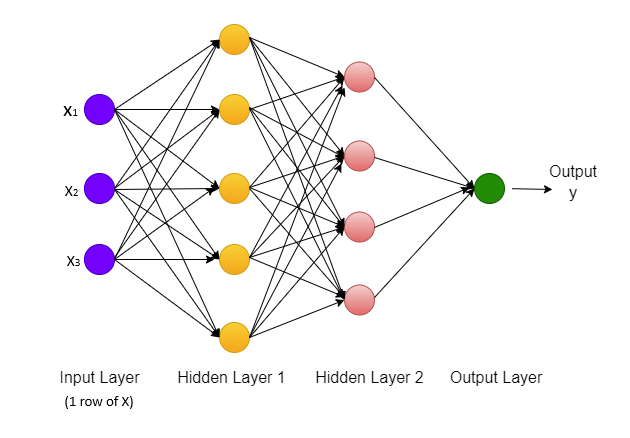

In each neruon, there will be a single bias value and a weight value for every input value. These are the parameters that the model learns.

So for every layer (other than the input layer) there are a total of input_dim X output_dim weight parameters, and output_dim bias parameters.

Zooming into a single neuron:
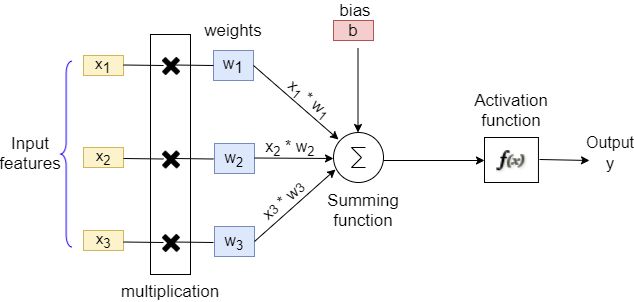
https://www.bombaysoftwares.com/blog/feed-forward-propagation

## How does the model learn parameter values?

Most common method is gradient descent!

We start by randomly choosing values for every parameter! (They must be different, we can't just pick all 0's because that would defeat the purpose of multineuron layers)

### Forward Propagation

Input layer is fed into the first hidden layer, output of that is fed into the next hidden layer...until we get the final output.

The loss is then computed by comparing the final output to the true value of y.

### Back Propagation
The gradient of the loss is then computed for the output layer, and this is then passed to the previous layer, whose gradient is computed using the chain rule! This goes back to the first hidden layer

### Optimization Step
Each parameter is then decremented by the gradient times the learning rate.

Go back to Forward Propagation, rinse and repeat!

A single neuron without an activation is essentially a linear regression!

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set random seed
np.random.seed(0)

# Generate dummy data
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Linear Regression
model = LinearRegression()
model.fit(X_normalized, y)
print("Linear Regression Coefficients:", model.coef_, "Intercept:", model.intercept_)


Linear Regression Coefficients: [1.1180338 1.1180336] Intercept: 5.0


In [3]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Generate dummy data
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a single layer model
model = nn.Linear(2, 1, bias=True)

# Initialize weights manually to match sklearn initialization
nn.init.constant_(model.weight, 0.0)
nn.init.constant_(model.bias, 0.0)

# Define the loss function
criterion = nn.MSELoss()

# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

# Training loop with manual gradient descent
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass
    loss.backward()
    
    # Manually update weights
    with torch.no_grad():
        model.weight -= learning_rate * model.weight.grad
        model.bias -= learning_rate * model.bias.grad
    
    # Zero the gradients after updating
    model.weight.grad.zero_()
    model.bias.grad.zero_()

print("Single Layer NN Weights:", model.weight.data.numpy(), "Bias:", model.bias.data.numpy())


Single Layer NN Weights: [[1.1180326 1.1180326]] Bias: [4.9999886]


If we add a sigmoid activation function, it becomes a Logistic Regression!

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set random seed
np.random.seed(0)

# Generate dummy data
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]], dtype=np.float32)
y = np.array([0, 0, 1, 1, 1], dtype=np.float32)

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Logistic Regression
logreg = LogisticRegression(penalty=None, solver='lbfgs', random_state=0)
logreg.fit(X_normalized, y)
print("Logistic Regression Coefficients:", logreg.coef_, "Intercept:", logreg.intercept_)


Logistic Regression Coefficients: [[12.91401093 12.91401093]] Intercept: [9.04223626]


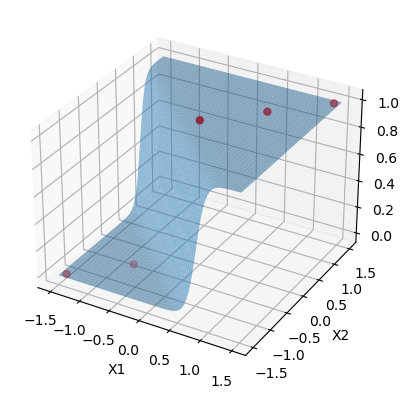

In [8]:
from matplotlib import pyplot as plt
#import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_normalized[:,0], X_normalized[:,1], y, marker='.', color='red', s=100, )
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

coefs = logreg.coef_
intercept = logreg.intercept_
x1s = np.tile(np.linspace(-1.5, 1.5, 100), (100, 1))
x2s = np.tile(np.linspace(-1.5, 1.5, 100), (100, 1)).T
ys = logreg.predict_proba(np.hstack([x1s.reshape(-1, 1), x2s.reshape(-1, 1)]))[:, 1].reshape(100, 100)

ax.plot_surface(x1s, x2s, ys, alpha=0.5)
plt.show()

In [9]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Generate dummy data
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]], dtype=np.float32)
y = np.array([0, 0, 1, 1, 1], dtype=np.float32)

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a single layer model with sigmoid activation
class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.linear = nn.Linear(2, 1)
        # Initialize weights and bias to zero
        nn.init.constant_(self.linear.weight, 0.0)
        nn.init.constant_(self.linear.bias, 0.0)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = SingleLayerNN()

# Define the loss function
criterion = nn.BCELoss()

# Set learning rate and number of epochs
learning_rate = 1
epochs = 100000

# Training loop with batch gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Single Layer NN Weights:", model.linear.weight.data.numpy(), "Bias:", model.linear.bias.data.numpy())


Single Layer NN Weights: [[12.737111 12.737111]] Bias: [8.804143]


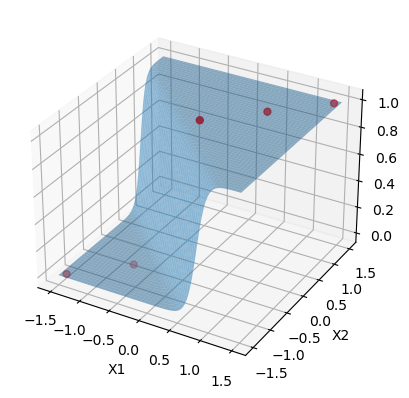

In [10]:
from matplotlib import pyplot as plt
#import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_normalized[:,0], X_normalized[:,1], y, marker='.', color='red', s=100, )
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

coefs = logreg.coef_
intercept = logreg.intercept_
x1s = np.tile(np.linspace(-1.5, 1.5, 100), (100, 1))
x2s = np.tile(np.linspace(-1.5, 1.5, 100), (100, 1)).T 
#logit = x1s * model.linear.weight.data.numpy()[0][0] \ 
#    + x2s * model.linear.weight.data.numpy()[0][1] 
#    + model.linear.bias.data.numpy()[0]
ys = model.forward(torch.FloatTensor(np.hstack([x1s.reshape(-1, 1), x2s.reshape(-1, 1)]))).detach().numpy().reshape(100, 100)
ax.plot_surface(x1s, x2s, ys, alpha=0.5)
plt.show()

## Non Linear Activation Functions

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
https://pytorch.org/docs/stable/nn.html#non-linear-activations-other

Most Important:
- ReLU (most commonly used between hidden layers) variants include:
    - leaky ReLU
    - ELU
    - PReLU
    - ReLU6
- Sigmoid - used as last activation on binary classification (used to be used in between hidden layers)
- Softmax - used as last activation on multiclass classification
- Tanh - used to be used a lot (used to be used between hidden layers)

## The ReLU Activation 

The most commonly used activation function in between linear layers is the ReLU Activation

$$f(x)=x^{+}=\max(0,x)={\frac {x+|x|}{2}}={\begin{cases}x&{\text{if }}x>0,\\0&{\text{otherwise}},\end{cases}}$$
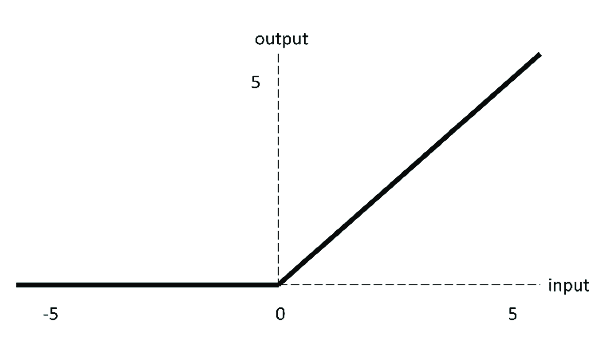

In [13]:
import torch.nn.functional as F

# Apply ReLU activation
x = torch.tensor([-1.0, 0.0, 1.0])
relu_activation = F.relu(x)
print(relu_activation)

tensor([0., 0., 1.])


## Loss Functions

https://pytorch.org/docs/stable/nn.html#loss-functions

Most Important:
- MSELoss (mean squared error - often used in regression tasks)
- CrossEntropyLoss (used in multiclass classification)
- BCELoss (Binary Cross Entropy - used in binary classification)

## Model Dissection

In [31]:
# Define a loss function
loss_fn = nn.MSELoss()

# Define a simple model
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

print("FORWARD PROPAGATION\n-------------------------------")
inputs = torch.randn(1, 4)
outputs = model(inputs)
print(f"input_layer={inputs}\n\n")
print(f"hidden_layer: \n\nweights={model[0].weight}, \n\nbiases={model[0].bias}\n\n")
print(f"output_layer: \n\nweights={model[2].weight}, \n\nbiases={model[2].bias}\n\n")
loss = loss_fn(outputs, torch.tensor([[1.0]]))
print(f"output={outputs}, y_true={torch.tensor([[1.0]])}, loss={loss}\n\n\n")

print("BACKWARD PROPAGATION\n-------------------------------")
optimizer.zero_grad()
loss.backward()
print(f"hidden_layer: \n\nweights_grad=\n{model[0].weight.grad}, \n\nbiases_grad={model[0].bias.grad}\n\n")
print(f"output_layer: \n\nweights_grad={model[2].weight.grad}, \n\nbiases_grad={model[2].bias.grad}\n\n")

print("OPTIMIZATION STEP\n-------------------------------")
optimizer.step()
print(f"hidden_layer: \n\nnew_weights={model[0].weight}, \n\nnew_biases={model[0].bias}\n")
print(f"output_layer: \n\nnew_weights={model[2].weight}, \n\nnew_biases={model[2].bias}\n")

FORWARD PROPAGATION
-------------------------------
input_layer=tensor([[ 0.9736, -0.1186,  0.0750, -2.0841]])


hidden_layer: 

weights=Parameter containing:
tensor([[-0.2443,  0.0442,  0.2898, -0.0497],
        [ 0.1522, -0.1206,  0.1752, -0.3622],
        [-0.2940, -0.2538,  0.4595, -0.1345]], requires_grad=True), 

biases=Parameter containing:
tensor([-0.0014, -0.2422,  0.4991], requires_grad=True)


output_layer: 

weights=Parameter containing:
tensor([[ 0.5639, -0.4354, -0.4680]], requires_grad=True), 

biases=Parameter containing:
tensor([-0.4376], requires_grad=True)


output=tensor([[-0.9984]], grad_fn=<AddmmBackward0>), y_true=tensor([[1.]]), loss=3.9935033321380615



BACKWARD PROPAGATION
-------------------------------
hidden_layer: 

weights_grad=
tensor([[ 0.0000, -0.0000,  0.0000, -0.0000],
        [ 1.6943, -0.2064,  0.1305, -3.6269],
        [ 1.8212, -0.2218,  0.1403, -3.8985]]), 

biases_grad=tensor([0.0000, 1.7403, 1.8706])


output_layer: 

weights_grad=tensor([[ 0

Thinking of the inputs, outputs, weights, and biases of Linear Layers as vectors and Matrices:
- Linear layers have an input and an output dimension
- Input dimension of first first hidden layer must match the dimension of input layer (number of features in X).
- Input dimension of middle layers (hidden layers) must match the dimension of its previous linear layer's output dimension
- Output dimension of last linear layer (output layer) must match the number of outputs desired per row of data (typically 1 if - regression or binary classification, or $c$ if multiclass classification with $c$ classes)

Example:

- Say we have 9 features - think of the input layer as a row vector of length we'll call it $x$

- Let's say we want the first hidden layer to have 21 outputs - we can think of the weights $W_1$ as a 9 X 21 matrix, and the biases $b_1$ as a 21 length row vector.
    - a row 9 length row vector $x$ times a 9 X 21 matrix $W_1$ yields a 21 length row vector
    - we can then add the 21-length $b_1$ bias vector (an element-wise operation) yielding a 21-length row vector as the hidden output 
    - we can then pass that outputthrough our chosen activation function $f_1$, which does not change its shape
    - $h_1 = f_1(xW_1 + b_1)$ - a 21 length row vector
- Let's say we want our next hidden layer to have 5 outputs - our $W_2$ will need to be a 21 X 5 matrix and $b2$ will be a 5-length vector.
    - $h_2 = f_2(h_1W_2+b_2)$ - a 5-length row vector
- Now let's assume we are trying to predict one of 3 classes. Our output layer, will consist of - a 5 X 3 $W_3$ and a 3 length $b_3$, then we'll run the final output through a softmax function which applies a sigmoid to each output and divides by the sum of sigmoids of all outputs (so that the total probability of each example sums to 1)
    - $\hat y = \text{softmax}(h_2W_3+b_3)$ - a 5-length row vector, one element per class containing the predicted probability that $y$ is that class.



## Epochs & Batches

Training a Neural network one row at a time, can be very slow, and also prone to overfit.

With modern processors, we can forward passes on multiple rows of X simultaneously and compute the average loss for each example before doing backpropagation.

The number of rows that we send through the network each forward pass is referred to as the batch size. (sometimes called minibatch size)

After each batch of examples, we run back propagation and an optimization step to update model parameters.

When every row of data has been sent through the network, that is considered the completion of an epoch.

When graphing losses to visualize convergence, we typically do so at the end of each epoch (but there are no hard and fast rules).

A batch can be as small as one row and as large as the total number of rows in the data set.

pytorch has classes and functions to help with all of this.

Let's rethink the last example using a bactch size of 8:

- Say we have 9 features and a batch size of 8 - think of the input layer $X$ as an 8 X 9 vector (batch X features)

- Let's say we want the first hidden layer to have 21 outputs - we can think of the weights $W_1$ as a 9 X 21 matrix, and the biases $b_1$ as a 21 length row vector.
    - an row 8 X 9 length matrix $X$ times a 9 X 21 matrix $W_1$ yields an 8 X 21 matrix
    - we can then add the 21-length $b_1$ bias vector (added element-wise to each row of W_1) keepint the same dimension matrix as the hidden output.
    - We can then pass that output through our chosen activation function $f_1$, which operates element by element and does not change its shape.
    - $H_1 = f_1(XW_1 + b_1)$ - an 8 X 21 Matrix

- Let's say we want our next hidden layer to have 5 outputs - our $W_2$ will need to be a 21 X 5 matrix and $b2$ will be a 5-length vector.
    - $H_2 = H_1W_2+b_2$ an 8 X 5 matrix 
- Now let's assume we are trying to predict one of 3 classes. Our output layer, will consist of - a 5 X 3 $W_3$ and a 3 length $b_3$, then we'll run the final output through a softmax function which applies a sigmoid to each output and divides by the sum of sigmoids in each row of the outputs (so that the total probability of each row sums to 1)
    - $\hat Y = \text{softmax}(H_2W_3+b_3)$ - an 8 X 3 matrix (one row per example, one column per class)
    
Note that increasing the batch size does not change the number of parameters that need to be trained, it just does more at once.

## Parameter Initialization

https://pytorch.org/docs/stable/nn.init.html

- Pytorch initializes each weight and bias parameter value by default as:
$$v_\text{initial} \sim U(-\sqrt{\text{output_dim}}, \sqrt{\text{output_dim}})$$
(pytorch draws each value of weight and bias parameter from a uniform distribution bounded by the positive and negative square roots of the output dimension)
- In some cases it's worth using more sophisticated initialization methods to avoid problems like vanishing gradients (gradient gets so close to zero, python treats it as zero) or exploding gradients (gradient gets so large (or negatively small) it causes an overflow error)
    - Xavier (uniform and scaled by variance of inputs - prevents vanishing
    - Kaiming (uniform and sacaled by variance of inputs taking into account nonlinearity of activation functions - prevents vanishing)
    - Normal (draws from normal distribution - prevents exploding)

## Optimization

https://pytorch.org/docs/stable/optim.html

Optimization is the process of actually updating the parameters to hopefully reduce the loss.

The main one you need to know is SGD

Another important one is ADAM which uses monemtum to get past local minima

Many (including SGD) have optional momentum parameters which can help your model get past local minima. (thing of a ball rolloing down a hill and continuing past a local dip)

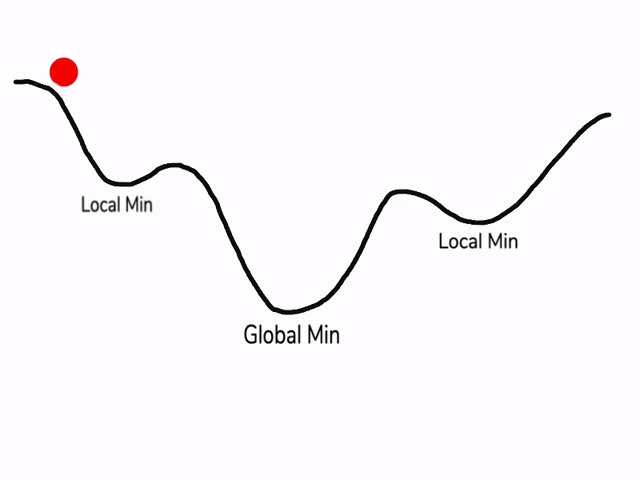

source: https://medium.com/@kaitotally/adam-the-birthchild-of-adagrad-and-rmsprop-b5308b24b9cd

## Universal Approximation Theorem
*The magic of non-linearities*

For any function $f(x) = y$ and any error $\epsilon > 0$, there exists a sufficiently large neural network that can estimate $f$ with an error $<\epsilon$.

I other words, a big enough neural netwok can learn any aribitrary function!

However, this only applies with non-linearities, it does not work without them!

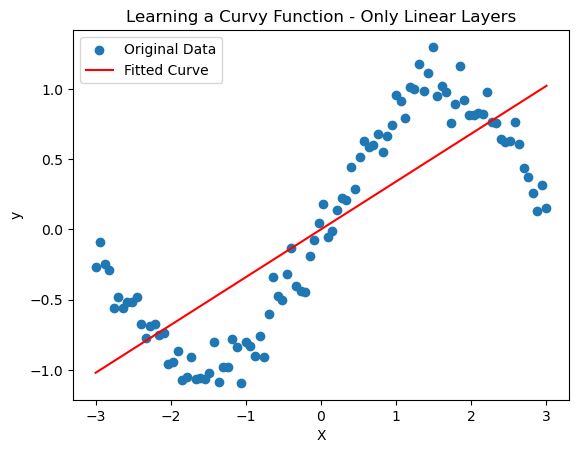

In [35]:
from torch import optim
# Generate dummy data
X = torch.linspace(-3, 3, steps=100).view(-1, 1)
y = torch.sin(X) + 0.1 * torch.randn(X.size())

# Define a neural network with just multiple linear layers
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), outputs.detach().numpy(), label='Fitted Curve', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Learning a Curvy Function - Only Linear Layers')
plt.legend()
plt.show()

Linear layers alone, are no better than plain old linear regression!

However, Enough ReLU activations can estimate any shape function!

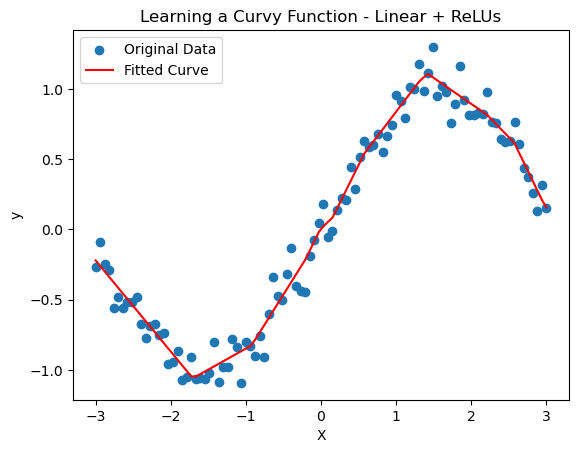

In [36]:
# Define a neural network with multiple layers and ReLUs
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), outputs.detach().numpy(), label='Fitted Curve', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Learning a Curvy Function - Linear + ReLUs')
plt.legend()
plt.show()

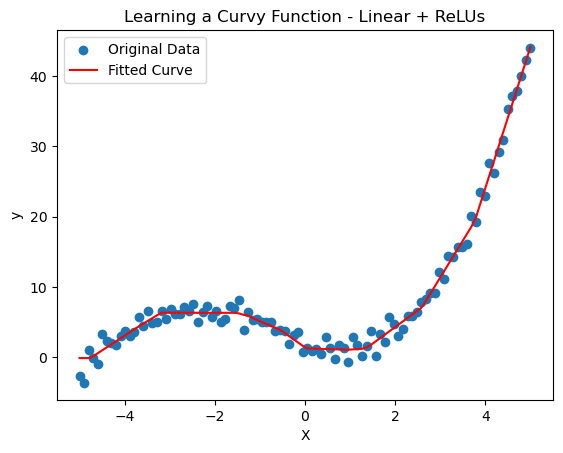

In [56]:
from torch import optim
# Generate dummy data
X = torch.linspace(-5, 5, steps=100).view(-1, 1)
y = (X**3 + 3 * X**2 - 6 * X + 8)/4 + torch.randn(X.size())

# Define a neural network with multiple layers and ReLUs
model = nn.Sequential(
    nn.Linear(1, 8),
    nn.ReLU(),
    nn.Linear(8, 32),
    nn.ReLU(),
    nn.Linear(32, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), outputs.detach().numpy(), label='Fitted Curve', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Learning a Curvy Function - Linear + ReLUs')
plt.legend()
plt.show()

### Coding PyTorch Models
#### Creating a Model Class

In [99]:
class PolyNet(nn.Module): # Name your model whatever you want, make it a subclass of torch.nn.Module
    def __init__(self): # You can of course add arguments if you want a flexible model class
        super().__init__() #this line must be included to run __init__ of nn.module
        
        # Add your linear layers here, 
        # note that the output dmension of each matches the input dimension of the next 
        # The order here doesn't actually matter, but it's a good idea to do it in order for clarity
        self.hidden1 = nn.Linear(1, 16)  
        self.hidden2 = nn.Linear(16, 32)
        self.hidden3 = nn.Linear(32, 4)
        self.output = nn.Linear(4, 1)
        # You can add non-linearities here or in the forward method
        
    def forward(self, x): # this method applies all the layers and non linearities to an input to get the output
        # Often some transformation of x is done here (flattenning, normalization, whatever)
        h1 = torch.relu(self.hidden1(x))
        h2 = torch.relu(self.hidden2(h1))
        h3 = torch.relu(self.hidden3(h2))
        y = self.output(h3)
        return y

#### Training the Model

In [100]:
model = PolyNet() # Instantiate the model
loss_fn = nn.MSELoss() # pick a loss function
optimizer = optim.Adam(model.parameters(), lr=0.01) # pick and optimizer

# Training loop
epochs = 10000 # determine your epochs
batch_size = 50 # set your batch_size if desired
model.train() # puts the model in train mode
for epoch in range(epochs): # epoch loop
    for i in range(0, len(y), batch_size): # batch loop
        outputs = model(X[i: i + batch_size]) # forward pass
        loss = criterion(outputs, y[i: i + batch_size]) # compute loss
        # often the loss value of each batch is recorded and saved to either print
        # at the end of the epoch or graph progress or both
        
        optimizer.zero_grad()  # must be called before backward pass 
        loss.backward() # backward pass
        optimizer.step() # update parameters
    # Often at the end of an epoch, another process is run to compute the metrics for
    # a validation set for observation
    

#### Evaluation (Inference, Prediction, etc.)

In [101]:
model.eval() # put it in eval mode

# Do it all at once:
y_pred = model(X)

In [102]:
# Or do it in batches:
y_preds = []
for i in range(0, len(y), batch_size): # batch loop
    y_preds.append(model(X[i: i+ batch_size])) # forward pass
y_pred = torch.cat(y_preds)

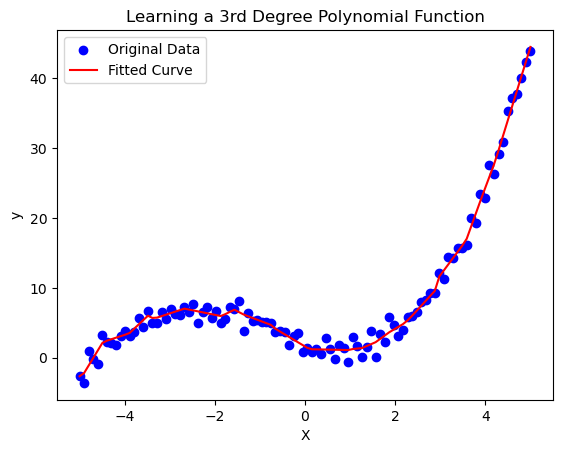

In [103]:
# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original Data', color='b')
plt.plot(X.numpy(), y_pred.detach().numpy(), label='Fitted Curve', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Learning a 3rd Degree Polynomial Function')
plt.legend()
plt.show()

### Datasets & DataLoaders

Datasets DataLoaders are pyTorch classes you can use to make it much easier to feed data into a neural network for training and evaluation

- Dataset
    - essentially is a list of examples (rows) from your data
    - each element is usually a tuple of a specific (x, y), but could be a dictionary

- DataLoader
    - a class that can grab batches from a Dataset
    - can also shuffle your data and do other tricks

In [109]:
from torch.utils.data import Dataset, DataLoader

class MyDataSet(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return X[idx], y[idx]
    
mydataset = MyDataSet(X, y)
mydataloader = DataLoader(mydataset, batch_size = 25, shuffle = True)

#### Rewrite the Above training loop using DataLoader

In [114]:
# Training loop
epochs = 10000 # determine your epochs
model.train() # puts the model in train mode
for epoch in range(epochs): # epoch loop
    for batch_x, batch_y in mydataloader: # batch loop
        outputs = model(batch_x) # forward pass
        loss = criterion(outputs, batch_y) # compute loss
        # often the loss value of each batch is recorded and saved to either print
        # at the end of the epoch or graph progress or both
        
        optimizer.zero_grad()  # must be called before backward pass 
        loss.backward() # backward pass
        optimizer.step() # update parameters
    # Often at the end of an epoch, another process is run to compute the metrics for
    # a validation set for observation